In [1]:
# generic data science libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import scikit-learn
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression


import pickle

# metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, auc, confusion_matrix, roc_curve

In [2]:
# df = pd.read_csv("..\data\DallasAccidents.csv")
df = pd.read_csv("..\..\TexasAccidents.csv")
pd.set_option('display.max_columns', None)
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-261009,MapQuest,201.0,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,NaN,NaN,0.01,Accident on RM-2222 Northland Dr at Mo Pac Exp...,NaN,Mopac Expy S,R,Austin,Travis,TX,78731,US,US/Central,KATT,2016-11-30 15:51:00,66.0,NaN,24.0,30.01,10.0,NNW,5.8,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-261010,MapQuest,201.0,2,2016-11-30 16:32:18,2016-11-30 17:47:02,30.328165,-97.694305,NaN,NaN,0.00,Accident on Grand Canyon Dr between Westheimer...,1128.0,E Saint Johns Ave,L,Austin,Travis,TX,78752-2826,US,US/Central,KATT,2016-11-30 16:51:00,62.1,NaN,25.0,30.03,10.0,North,4.6,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-261011,MapQuest,201.0,2,2016-11-30 16:31:45,2016-11-30 17:46:34,30.326077,-97.692307,NaN,NaN,0.00,Accident on Saint Johns Ave at Cameron Rd.,7197.0,Cameron Rd,R,Austin,Travis,TX,78752,US,US/Central,KATT,2016-11-30 16:51:00,62.1,NaN,25.0,30.03,10.0,North,4.6,NaN,Clear,False,False,False,False,False,False,False,False,True,False,False,True,False,Day,Day,Day,Day
3,A-261012,MapQuest,201.0,2,2016-11-30 16:06:49,2016-11-30 17:27:00,32.856014,-97.513084,NaN,NaN,0.01,#2 lane blocked and right hand shoulder blocke...,NaN,Hanger Cutoff Rd,R,Fort Worth,Tarrant,TX,76135,US,US/Central,KAWN,2016-11-30 16:00:00,NaN,NaN,NaN,NaN,NaN,North,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,A-261013,MapQuest,201.0,3,2016-11-30 16:35:01,2016-11-30 17:49:39,32.797668,-97.212090,NaN,NaN,0.01,#2 lane blocked and right hand shoulder blocke...,NaN,I-820 N,R,Fort Worth,Tarrant,TX,76118,US,US/Central,KFWD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


# Get Info on CSV

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376445 entries, 0 to 376444
Data columns (total 49 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     376445 non-null  object 
 1   Source                 376445 non-null  object 
 2   TMC                    301303 non-null  float64
 3   Severity               376445 non-null  int64  
 4   Start_Time             376445 non-null  object 
 5   End_Time               376445 non-null  object 
 6   Start_Lat              376445 non-null  float64
 7   Start_Lng              376445 non-null  float64
 8   End_Lat                75142 non-null   float64
 9   End_Lng                75142 non-null   float64
 10  Distance(mi)           376445 non-null  float64
 11  Description            376444 non-null  object 
 12  Number                 154562 non-null  float64
 13  Street                 376445 non-null  object 
 14  Side                   376445 non-nu

In [4]:
df.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.nunique()

ID                       376445
Source                        3
TMC                          20
Severity                      4
Start_Time               356659
End_Time                 361235
Start_Lat                126424
Start_Lng                111533
End_Lat                   32169
End_Lng                   32330
Distance(mi)               3924
Description              203353
Number                    14342
Street                    22489
Side                          2
City                        755
County                      219
State                         1
Zipcode                   42054
Country                       1
Timezone                      2
Airport_Code                185
Weather_Timestamp        132229
Temperature(F)              550
Wind_Chill(F)               449
Humidity(%)                  97
Pressure(in)                488
Visibility(mi)               48
Wind_Direction               24
Wind_Speed(mph)              85
Precipitation(in)           159
Weather_

In [6]:
df["Street"].value_counts()

I-45 N           6707
I-45 S           4661
I-35 N           4488
I-35 S           4449
I-10 W           4022
                 ... 
Opal Trl            1
N Central Ave       1
Tatum St            1
Mission Top         1
Castle Vw           1
Name: Street, Length: 22489, dtype: int64

# Clean Data

In [7]:
# Sort Street Type
df.loc[df['Street'].str.contains(' Ln'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' Lane'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' Way'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' Sq'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' Pl'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' Plz'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' Rd'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' Road'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' Dr'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' Ave'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' Trl'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' Trail'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' Blvd'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' Boulevard'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' St'), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains(' Cir'), 'Road_Type'] = 'Street'

df.loc[df['Street'].str.contains('FM '), 'Road_Type'] = 'Street'
df.loc[df['Street'].str.contains('Cr '), 'Road_Type'] = 'Street'

df.loc[df['Street'].str.contains(' Hwy'), 'Road_Type'] = 'Highway'
df.loc[df['Street'].str.contains('Highway'), 'Road_Type'] = 'Highway'
df.loc[df['Street'].str.contains('US-'), 'Road_Type'] = 'Highway'
df.loc[df['Street'].str.contains('Loop '), 'Road_Type'] = 'Highway'
df.loc[df['Street'].str.contains(' Fwy'), 'Road_Type'] = 'Highway'
df.loc[df['Street'].str.contains(' Freeway'), 'Road_Type'] = 'Highway'
df.loc[df['Street'].str.contains(' Tollway'), 'Road_Type'] = 'Highway'
df.loc[df['Street'].str.contains('TX-'), 'Road_Type'] = 'Highway'
df.loc[df['Street'].str.contains('I-'), 'Road_Type'] = 'Highway'
df.loc[df['Street'].str.contains(' Ext'), 'Road_Type'] = 'Highway'
df.loc[df['Street'].str.contains(' Expy'), 'Road_Type'] = 'Highway'
df.loc[df['Street'].str.contains(' Tpk'), 'Road_Type'] = 'Highway'
df.loc[df['Street'].str.contains(' Connection'), 'Road_Type'] = 'Highway'


#df.loc[df['Street'].str.contains(''), 'Road_Type'] = 'NA'

In [8]:
df["Road_Type"].count()

356466

In [9]:
df["Road_Type"].value_counts()

Street     208661
Highway    147805
Name: Road_Type, dtype: int64

In [10]:
# Clear
df.loc[df['Weather_Condition'].str.contains('Fair', na=False), 'Weather_Condition1'] = 'Clear'
df.loc[df['Weather_Condition'].str.contains('Clear', na=False), 'Weather_Condition1'] = 'Clear'
df.loc[df['Weather_Condition'].str.contains('N/A Precipitation', na=False), 'Weather_Condition1'] = 'Clear'

# Cloudy
df.loc[df['Weather_Condition'].str.contains('Cloudy', na=False), 'Weather_Condition1'] = 'Cloudy'
df.loc[df['Weather_Condition'].str.contains('Clouds', na=False), 'Weather_Condition1'] = 'Cloudy'
df.loc[df['Weather_Condition'].str.contains('Overcast', na=False), 'Weather_Condition1'] = 'Cloudy'

#Fog/Haze
df.loc[df['Weather_Condition'].str.contains('Fog', na=False), 'Weather_Condition1'] = 'Fog/Haze'
df.loc[df['Weather_Condition'].str.contains('Smoke', na=False), 'Weather_Condition1'] = 'Fog/Haze'
df.loc[df['Weather_Condition'].str.contains('Dust', na=False), 'Weather_Condition1'] = 'Fog/Haze'
df.loc[df['Weather_Condition'].str.contains('Haze', na=False), 'Weather_Condition1'] = 'Fog/Haze'
df.loc[df['Weather_Condition'].str.contains('Sand', na=False), 'Weather_Condition1'] = 'Fog/Haze'

#Rain
df.loc[df['Weather_Condition'].str.contains('Rain', na=False), 'Weather_Condition1'] = 'Rain'
df.loc[df['Weather_Condition'].str.contains('Mist', na=False), 'Weather_Condition1'] = 'Rain'
df.loc[df['Weather_Condition'].str.contains('Drizzle', na=False), 'Weather_Condition1'] = 'Rain'
df.loc[df['Weather_Condition'].str.contains('Shower', na=False), 'Weather_Condition1'] = 'Rain'

# Thunder Storm
df.loc[df['Weather_Condition'].str.contains('Thunder', na=False), 'Weather_Condition1'] = 'Thunder Storm'
df.loc[df['Weather_Condition'].str.contains('T-Storm', na=False), 'Weather_Condition1'] = 'Thunder Storm'

# Wintery Mix
df.loc[df['Weather_Condition'].str.contains('Wintry', na=False), 'Weather_Condition1'] = 'Wintery Mix'
df.loc[df['Weather_Condition'].str.contains('Icy', na=False), 'Weather_Condition1'] = 'Wintery Mix'
df.loc[df['Weather_Condition'].str.contains('Ice', na=False), 'Weather_Condition1'] = 'Wintery Mix'
df.loc[df['Weather_Condition'].str.contains('Snow', na=False), 'Weather_Condition1'] = 'Wintery Mix'

In [11]:
df["Weather_Condition1"].unique()

array(['Clear', nan, 'Cloudy', 'Rain', 'Fog/Haze', 'Wintery Mix',
       'Thunder Storm'], dtype=object)

In [12]:
df["Weather_Condition1"].value_counts()

Cloudy           199473
Clear            135778
Rain              21944
Fog/Haze           6885
Thunder Storm      4575
Wintery Mix         239
Name: Weather_Condition1, dtype: int64

In [13]:
# Add Initial Severity Column
df.loc[df['Severity'] == 1, 'Init_Severity'] = 0
df.loc[df['Severity'] == 2, 'Init_Severity'] = 0
df.loc[df['Severity'] == 3, 'Init_Severity'] = 1
df.loc[df['Severity'] == 4, 'Init_Severity'] = 1

In [14]:
df["Init_Severity"].value_counts()

0.0    274852
1.0    101593
Name: Init_Severity, dtype: int64

# Get Columns for new Data Frame

In [15]:
df_sub = df.loc[:, [ 'Severity', 'Init_Severity', 'Distance(mi)', 'Side', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition1', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Road_Type']]

In [16]:
df_sub = df_sub.dropna(subset=['Weather_Condition1', 'Wind_Speed(mph)', 'Humidity(%)', 
                               'Temperature(F)', 'Pressure(in)', 'Visibility(mi)', 'Road_Type'])

In [17]:
df_sub["Weather_Condition1"].unique()

array(['Clear', 'Cloudy', 'Rain', 'Fog/Haze', 'Wintery Mix',
       'Thunder Storm'], dtype=object)

In [18]:
df_sub["Precipitation(in)"].unique()

array([ nan, 0.  , 0.06, 0.05, 0.01, 0.1 , 0.02, 0.04, 0.03, 0.12, 0.16,
       0.22, 0.2 , 0.13, 0.07, 0.09, 0.15, 0.08, 0.11, 0.27, 0.14, 0.18,
       0.3 , 0.19, 0.39, 0.17, 0.86, 0.42, 0.32, 0.38, 0.43, 0.21, 0.93,
       0.24, 0.78, 0.25, 1.37, 0.5 , 0.72, 0.26, 1.13, 0.41, 0.31, 0.58,
       0.48, 0.28, 0.29, 2.28, 0.34, 0.68, 0.73, 0.23, 0.62, 0.71, 0.47,
       0.4 , 0.82, 0.33, 0.54, 0.66, 1.  , 0.6 , 0.83, 0.57, 0.52, 0.49,
       0.79, 0.37, 0.61, 0.99, 0.53, 0.56, 1.28, 0.46, 1.11, 1.46, 1.06,
       0.65, 0.55, 0.77, 0.69, 0.36, 0.98, 1.12, 0.85, 0.89, 0.63, 1.58,
       1.6 , 0.81, 1.39, 1.38, 1.49, 0.84, 0.35, 1.25, 0.59, 0.64, 1.48,
       1.53, 1.16, 0.67, 0.76, 1.65, 0.44, 1.26, 1.19, 1.08, 0.45, 0.96,
       0.7 , 0.8 , 0.9 , 1.62, 0.97, 0.91, 2.07, 1.32, 1.81, 0.74, 1.75,
       0.92, 0.51, 1.42, 0.95, 2.53, 1.35, 1.41, 0.87, 1.15, 0.75, 1.69,
       1.3 , 1.33, 2.26, 0.94, 1.01, 1.14, 1.03, 1.09, 1.21, 2.55, 1.87,
       1.4 , 0.88, 1.72, 1.05, 1.04, 1.31, 2.31, 2.

In [19]:
df_sub["Precipitation(in)"].fillna(0, inplace=True)

In [20]:
df_sub["Precipitation(in)"].unique()

array([0.  , 0.06, 0.05, 0.01, 0.1 , 0.02, 0.04, 0.03, 0.12, 0.16, 0.22,
       0.2 , 0.13, 0.07, 0.09, 0.15, 0.08, 0.11, 0.27, 0.14, 0.18, 0.3 ,
       0.19, 0.39, 0.17, 0.86, 0.42, 0.32, 0.38, 0.43, 0.21, 0.93, 0.24,
       0.78, 0.25, 1.37, 0.5 , 0.72, 0.26, 1.13, 0.41, 0.31, 0.58, 0.48,
       0.28, 0.29, 2.28, 0.34, 0.68, 0.73, 0.23, 0.62, 0.71, 0.47, 0.4 ,
       0.82, 0.33, 0.54, 0.66, 1.  , 0.6 , 0.83, 0.57, 0.52, 0.49, 0.79,
       0.37, 0.61, 0.99, 0.53, 0.56, 1.28, 0.46, 1.11, 1.46, 1.06, 0.65,
       0.55, 0.77, 0.69, 0.36, 0.98, 1.12, 0.85, 0.89, 0.63, 1.58, 1.6 ,
       0.81, 1.39, 1.38, 1.49, 0.84, 0.35, 1.25, 0.59, 0.64, 1.48, 1.53,
       1.16, 0.67, 0.76, 1.65, 0.44, 1.26, 1.19, 1.08, 0.45, 0.96, 0.7 ,
       0.8 , 0.9 , 1.62, 0.97, 0.91, 2.07, 1.32, 1.81, 0.74, 1.75, 0.92,
       0.51, 1.42, 0.95, 2.53, 1.35, 1.41, 0.87, 1.15, 0.75, 1.69, 1.3 ,
       1.33, 2.26, 0.94, 1.01, 1.14, 1.03, 1.09, 1.21, 2.55, 1.87, 1.4 ,
       0.88, 1.72, 1.05, 1.04, 1.31, 2.31, 2.04, 2.

In [21]:
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317975 entries, 0 to 376444
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               317975 non-null  int64  
 1   Init_Severity          317975 non-null  float64
 2   Distance(mi)           317975 non-null  float64
 3   Side                   317975 non-null  object 
 4   Temperature(F)         317975 non-null  float64
 5   Humidity(%)            317975 non-null  float64
 6   Pressure(in)           317975 non-null  float64
 7   Visibility(mi)         317975 non-null  float64
 8   Wind_Speed(mph)        317975 non-null  float64
 9   Precipitation(in)      317975 non-null  float64
 10  Weather_Condition1     317975 non-null  object 
 11  Amenity                317975 non-null  bool   
 12  Bump                   317975 non-null  bool   
 13  Crossing               317975 non-null  bool   
 14  Give_Way               317975 non-nu

# Dummie Columns

In [22]:
obj_cols_to_dum = ['Side',
    'Weather_Condition1',
    'Amenity',
    'Bump', 
    'Crossing',
    'Give_Way',
    'Junction', 
    'No_Exit', 
    'Railway', 
    'Roundabout', 
    'Station',
    'Stop', 
    'Traffic_Calming', 
    'Traffic_Signal', 
    'Turning_Loop',
    'Sunrise_Sunset', 
    'Civil_Twilight', 
    'Nautical_Twilight',
    'Astronomical_Twilight',
    'Road_Type']

# get dums
dums_linear = pd.get_dummies(df_sub.loc[:, obj_cols_to_dum], drop_first=True)
dums_other = pd.get_dummies(df_sub.loc[:, obj_cols_to_dum], drop_first=False)

#concat
df_sub_linear = pd.concat([df_sub, dums_linear], axis=1)
df_sub_other = pd.concat([df_sub, dums_other], axis=1)

#drop original
df_sub_linear = df_sub_linear.drop(obj_cols_to_dum, axis=1)
df_sub_other = df_sub_other.drop(obj_cols_to_dum, axis=1)

# Get Severity and Mild Data Frames

In [23]:
df_mild_linear = df_sub_linear.loc[~(df['Severity'] == 3) & ~(df['Severity'] == 4)]
df_mild_other = df_sub_other.loc[~(df['Severity'] == 3) & ~(df['Severity'] == 4)]
df_severe_linear = df_sub_linear.loc[~(df['Severity'] == 1) & ~(df['Severity'] == 2)]
df_severe_other = df_sub_other.loc[~(df['Severity'] == 1) & ~(df['Severity'] == 2)]

df_mild_linear = df_mild_linear.drop(["Init_Severity"], axis=1)
df_mild_other = df_mild_other.drop(["Init_Severity"], axis=1)
df_severe_linear = df_severe_linear.drop(["Init_Severity"], axis=1)
df_severe_other = df_severe_other.drop(["Init_Severity"], axis=1)

In [24]:
df_sub_other = df_sub_other.drop(["Severity"], axis=1)
df_sub_linear = df_sub_linear.drop(["Severity"], axis=1)

In [25]:
df_sub_other.head()

,Init_Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Side_L,Side_R,Weather_Condition1_Clear,Weather_Condition1_Cloudy,Weather_Condition1_Fog/Haze,Weather_Condition1_Rain,Weather_Condition1_Thunder Storm,Weather_Condition1_Wintery Mix,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night,Road_Type_Highway,Road_Type_Street
0,0.0,0.01,66.0,24.0,30.01,10.0,5.8,0.0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
1,0.0,0.00,62.1,25.0,30.03,10.0,4.6,0.0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1
2,0.0,0.00,62.1,25.0,30.03,10.0,4.6,0.0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1
5,0.0,0.01,60.1,24.0,30.00,10.0,5.8,0.0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1
6,1.0,0.01,61.0,22.0,30.01,10.0,4.6,0.0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0


# Correlations

In [26]:
df_sub_other.corr()

,Init_Severity,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Side_L,Side_R,Weather_Condition1_Clear,Weather_Condition1_Cloudy,Weather_Condition1_Fog/Haze,Weather_Condition1_Rain,Weather_Condition1_Thunder Storm,Weather_Condition1_Wintery Mix,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Civil_Twilight_Day,Civil_Twilight_Night,Nautical_Twilight_Day,Nautical_Twilight_Night,Astronomical_Twilight_Day,Astronomical_Twilight_Night,Road_Type_Highway,Road_Type_Street
Init_Severity,1.000000,0.063437,0.010268,0.015818,0.048974,-0.005898,0.058645,0.022178,-0.240818,0.240818,-0.010850,-0.007491,-0.014166,0.031327,0.029099,-0.000092,-0.022088,0.022088,-0.014766,0.014766,-0.003523,0.003523,0.009981,-0.009981,0.440856,-0.440856
Distance(mi),0.063437,1.000000,-0.039435,0.006973,-0.009862,0.006505,0.003338,-0.001220,-0.071691,0.071691,0.022926,-0.022516,-0.001738,0.001015,-0.002714,0.019200,-0.056930,0.056930,-0.062309,0.062309,-0.067793,0.067793,-0.072134,0.072134,0.172745,-0.172745
Temperature(F),0.010268,-0.039435,1.000000,-0.299194,-0.140921,0.191987,0.033429,-0.039488,0.024649,-0.024649,-0.014781,0.106161,-0.049393,-0.161454,0.007166,-0.065135,0.297967,-0.297967,0.273854,-0.273854,0.249733,-0.249733,0.231905,-0.231905,-0.045925,0.045925
Humidity(%),0.015818,0.006973,-0.299194,1.000000,0.154491,-0.454839,-0.137554,0.143523,-0.014280,0.014280,-0.345431,0.136680,0.127700,0.290093,0.101956,0.020094,-0.229900,0.229900,-0.201847,0.201847,-0.176512,0.176512,-0.155777,0.155777,0.031228,-0.031228
Pressure(in),0.048974,-0.009862,-0.140921,0.154491,1.000000,-0.020456,0.007541,0.001085,-0.008039,0.008039,-0.068980,0.068707,0.001235,0.004221,-0.018770,-0.004969,0.012949,-0.012949,0.018042,-0.018042,0.020823,-0.020823,0.021945,-0.021945,0.017691,-0.017691
Visibility(mi),-0.005898,0.006505,0.191987,-0.454839,-0.020456,1.000000,0.031710,-0.257520,-0.001108,0.001108,0.254410,0.077943,-0.369556,-0.395359,-0.154926,-0.049680,0.017914,-0.017914,0.011564,-0.011564,0.007473,-0.007473,0.004793,-0.004793,0.000393,-0.000393
Wind_Speed(mph),0.058645,0.003338,0.033429,-0.137554,0.007541,0.031710,1.000000,0.026851,-0.028833,0.028833,-0.156007,0.129387,-0.047589,0.048055,0.040352,0.023010,0.132622,-0.132622,0.117645,-0.117645,0.106062,-0.106062,0.098581,-0.098581,0.043626,-0.043626
Precipitation(in),0.022178,-0.001220,-0.039488,0.143523,0.001085,-0.257520,0.026851,1.000000,-0.012330,0.012330,-0.084700,-0.096696,-0.006752,0.215642,0.335949,0.005095,-0.007949,0.007949,-0.008539,0.008539,-0.005808,0.005808,-0.003983,0.003983,0.022730,-0.022730
Side_L,-0.240818,-0.071691,0.024649,-0.014280,-0.008039,-0.001108,-0.028833,-0.012330,1.000000,-1.000000,0.009278,0.000625,0.009710,-0.018048,-0.014440,-0.003049,0.030819,-0.030819,0.025369,-0.025369,0.017604,-0.017604,0.010533,-0.010533,-0.354356,0.354356
Side_R,0.240818,0.071691,-0.024649,0.014280,0.008039,0.001108,0.028833,0.012330,-1.000000,1.000000,-0.009278,-0.000625,-0.009710,0.018048,0.014440,0.003049,-0.030819,0.030819,-0.025369,0.025369,-0.017604,0.017604,-0.010533,0.010533,0.354356,-0.354356


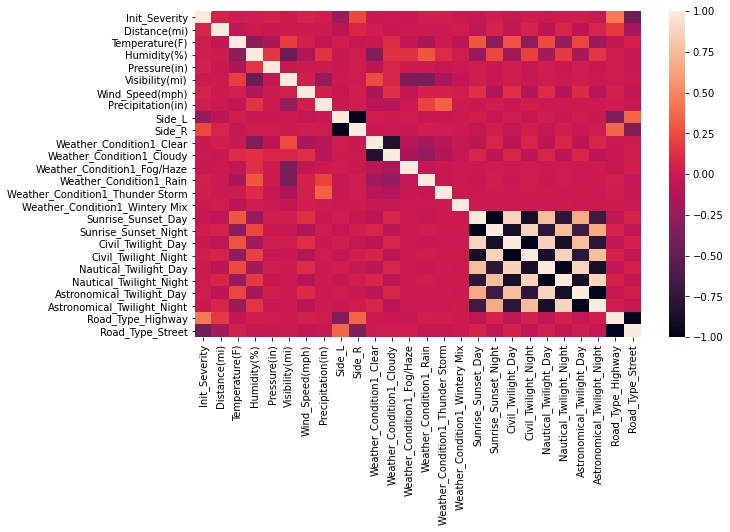

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df_sub_other.corr())
plt.show()

In [28]:
df_sub_linear.groupby("Init_Severity").size()

Init_Severity
0.0    233079
1.0     84896
dtype: int64

# Linear Models for Initial Severity

In [29]:
# get pandas columns for prediction
target = df_sub_linear["Init_Severity"]
features = df_sub_linear.drop(["Init_Severity"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

C:\Users\Ryan Permenter\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83    186440
         1.0       0.54      0.50      0.52     67940

    accuracy                           0.75    254380
   macro avg       0.68      0.67      0.67    254380
weighted avg       0.75      0.75      0.75    254380


Confusion Matrix - In Sample
[[157404  29036]
 [ 34158  33782]]


Classification Report - Out Sample
              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83     46639
         1.0       0.54      0.50      0.52     16956

    accuracy                           0.75     63595
   macro avg       0.68      0.67      0.67     63595
weighted avg       0.75      0.75      0.75     63595


Confusion Matrix - Out Sample
[[39453  7186]
 [ 8559  8397]]


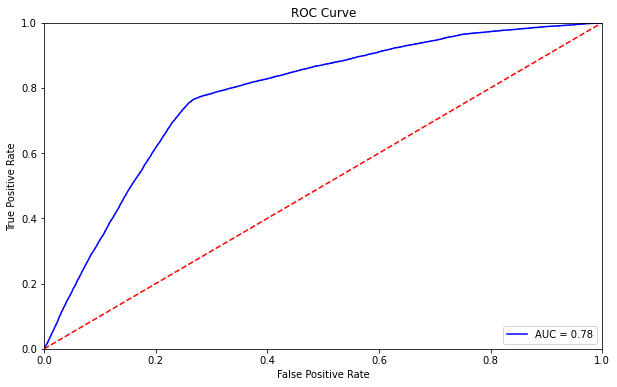

In [30]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

# get evaluation report
print("Logistic Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Other Models for Initial Severity

In [31]:
# get pandas columns for prediction
target = df_sub_other["Init_Severity"]
features = df_sub_other.drop(["Init_Severity"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

Decision Tree Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99    186440
         1.0       0.99      0.93      0.96     67940

    accuracy                           0.98    254380
   macro avg       0.98      0.96      0.97    254380
weighted avg       0.98      0.98      0.98    254380


Confusion Matrix - In Sample
[[186000    440]
 [  4634  63306]]


Classification Report - Out Sample
              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82     46639
         1.0       0.49      0.48      0.49     16956

    accuracy                           0.73     63595
   macro avg       0.65      0.65      0.65     63595
weighted avg       0.73      0.73      0.73     63595


Confusion Matrix - Out Sample
[[38270  8369]
 [ 8817  8139]]


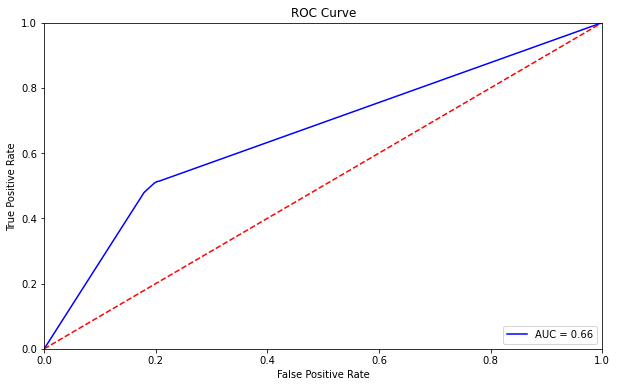

In [32]:
# train the model
dt = DecisionTreeClassifier(random_state=18)
dt.fit(X_train, y_train)

#get predictions
in_sample_preds = dt.predict(X_train)
out_sample_preds = dt.predict(X_test)

# get evaluation report
print("Decision Tree Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = dt.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99    186440
         1.0       0.97      0.95      0.96     67940

    accuracy                           0.98    254380
   macro avg       0.98      0.97      0.97    254380
weighted avg       0.98      0.98      0.98    254380


Confusion Matrix - In Sample
[[184553   1887]
 [  3193  64747]]


Classification Report - Out Sample
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85     46639
         1.0       0.60      0.51      0.55     16956

    accuracy                           0.78     63595
   macro avg       0.71      0.69      0.70     63595
weighted avg       0.77      0.78      0.77     63595


Confusion Matrix - Out Sample
[[40758  5881]
 [ 8312  8644]]


C:\Users\Ryan Permenter\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


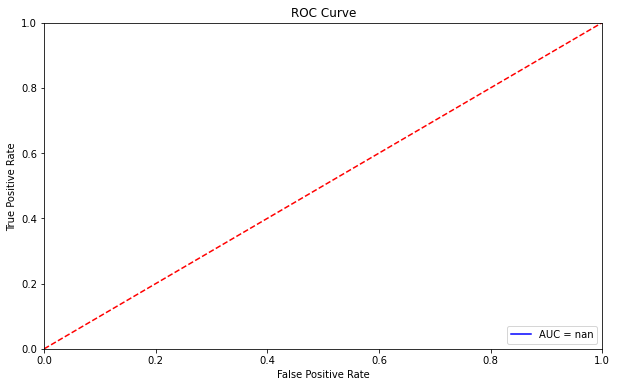

,0,1
3,Pressure(in),0.201373
1,Temperature(F),0.177764
2,Humidity(%),0.164062
5,Wind_Speed(mph),0.102407
23,Road_Type_Highway,0.093385
24,Road_Type_Street,0.086421
0,Distance(mi),0.070835
4,Visibility(mi),0.032429
7,Side_L,0.017247
8,Side_R,0.016093


In [33]:
# train the model
rf = RandomForestClassifier(random_state=18, n_estimators=100)
rf.fit(X_train, y_train)

#get predictions
in_sample_preds = rf.predict(X_train)
out_sample_preds = rf.predict(X_test)

# get evaluation report
print("Random Forest Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, pos_label=2)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

pd.DataFrame(list(zip(features.columns, rf.feature_importances_))).sort_values(by=1, ascending=False).head(10)

Ada Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84    186440
         1.0       0.56      0.55      0.56     67940

    accuracy                           0.77    254380
   macro avg       0.70      0.70      0.70    254380
weighted avg       0.76      0.77      0.76    254380


Confusion Matrix - In Sample
[[157591  28849]
 [ 30704  37236]]


Classification Report - Out Sample
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84     46639
         1.0       0.57      0.55      0.56     16956

    accuracy                           0.77     63595
   macro avg       0.70      0.70      0.70     63595
weighted avg       0.77      0.77      0.77     63595


Confusion Matrix - Out Sample
[[39580  7059]
 [ 7592  9364]]


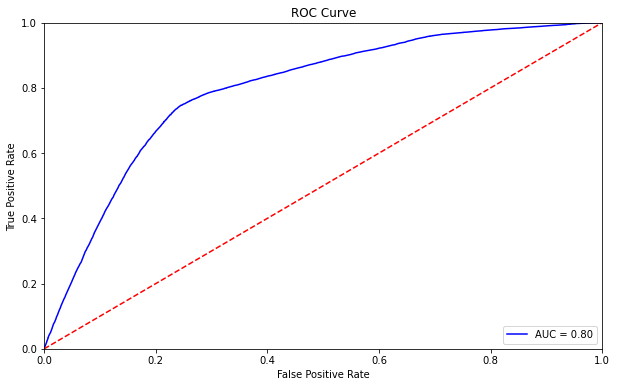

In [34]:
# train the model
ada = AdaBoostClassifier(random_state=18)
ada.fit(X_train, y_train)

#get predictions
in_sample_preds = ada.predict(X_train)
out_sample_preds = ada.predict(X_test)

# get evaluation report
print("Ada Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = ada.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

GradientBoosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84    186440
         1.0       0.57      0.59      0.58     67940

    accuracy                           0.77    254380
   macro avg       0.71      0.71      0.71    254380
weighted avg       0.77      0.77      0.77    254380


Confusion Matrix - In Sample
[[156359  30081]
 [ 27968  39972]]


Classification Report - Out Sample
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85     46639
         1.0       0.58      0.59      0.58     16956

    accuracy                           0.77     63595
   macro avg       0.71      0.72      0.71     63595
weighted avg       0.78      0.77      0.78     63595


Confusion Matrix - Out Sample
[[39277  7362]
 [ 6951 10005]]


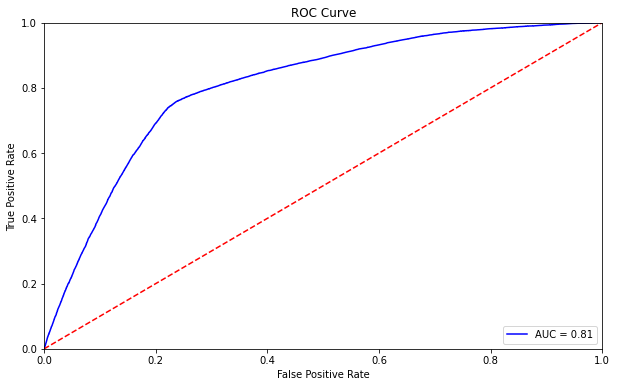

In [35]:
# train the model
gb = GradientBoostingClassifier(random_state=18)
gb.fit(X_train, y_train)

#get predictions
in_sample_preds = gb.predict(X_train)
out_sample_preds = gb.predict(X_test)

# get evaluation report
print("GradientBoosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = gb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\Ryan Permenter\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:32:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86    186440
         1.0       0.62      0.61      0.61     67940

    accuracy                           0.79    254380
   macro avg       0.74      0.73      0.74    254380
weighted avg       0.79      0.79      0.79    254380


Confusion Matrix - In Sample
[[160852  25588]
 [ 26821  41119]]


Classification Report - Out Sample
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.85     46639
         1.0       0.59      0.58      0.59     16956

    accuracy                           0.7

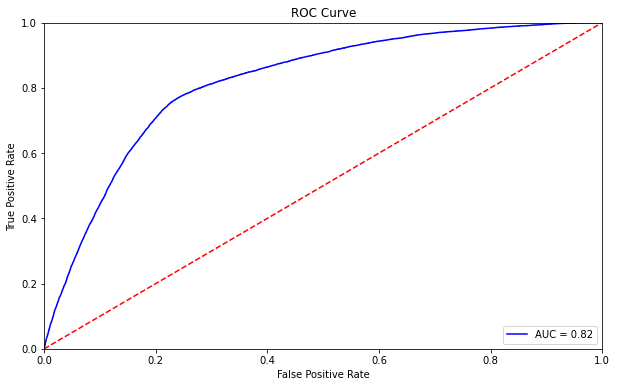

In [36]:
# train the model
xgb = XGBClassifier(random_state=18)
xgb.fit(X_train, y_train)

#get predictions
in_sample_preds = xgb.predict(X_train)
out_sample_preds = xgb.predict(X_test)

# get evaluation report
print("XG Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
# save the model to disk
filename = 'initial_model.sav'
pickle.dump(xgb, open(filename, 'wb'))

# Mild Severity Models

In [38]:
df_mild_linear["Severity"].replace((2, 1), (1, 0), inplace=True)

# get pandas columns for prediction
target = df_mild_linear["Severity"]
features = df_mild_linear.drop(["Severity"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

C:\Users\Ryan Permenter\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.46      0.02      0.04       857
           1       1.00      1.00      1.00    185606

    accuracy                           1.00    186463
   macro avg       0.73      0.51      0.52    186463
weighted avg       0.99      1.00      0.99    186463


Confusion Matrix - In Sample
[[    19    838]
 [    22 185584]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.29      0.01      0.02       198
           1       1.00      1.00      1.00     46418

    accuracy                           1.00     46616
   macro avg       0.64      0.50      0.51     46616
weighted avg       0.99      1.00      0.99     46616


Confusion Matrix - Out Sample
[[    2   196]
 [    5 46413]]


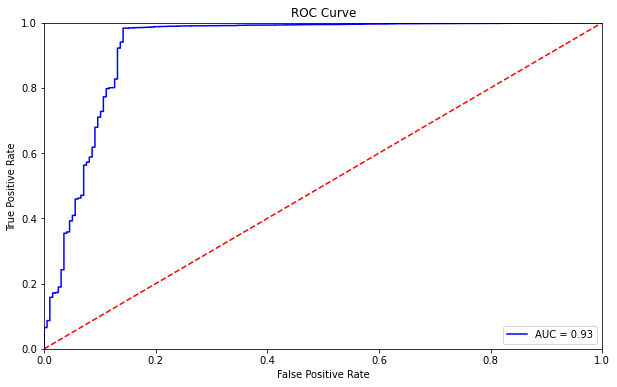

In [39]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

# get evaluation report
print("Logistic Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
df_mild_other["Severity"].replace((2, 1), (1, 0), inplace=True)

# get pandas columns for prediction
target = df_mild_other["Severity"]
features = df_mild_other.drop(["Severity"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

Decision Tree Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       857
           1       1.00      1.00      1.00    185606

    accuracy                           1.00    186463
   macro avg       0.95      0.99      0.97    186463
weighted avg       1.00      1.00      1.00    186463


Confusion Matrix - In Sample
[[   843     14]
 [    92 185514]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.38      0.43      0.40       198
           1       1.00      1.00      1.00     46418

    accuracy                           0.99     46616
   macro avg       0.69      0.71      0.70     46616
weighted avg       0.99      0.99      0.99     46616


Confusion Matrix - Out Sample
[[   85   113]
 [  139 46279]]


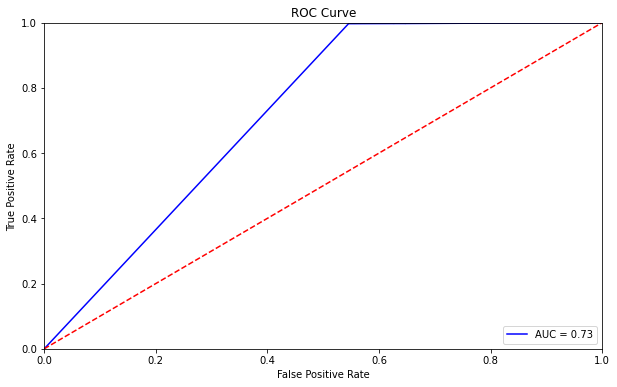

In [41]:
# train the model
dt = DecisionTreeClassifier(random_state=18)
dt.fit(X_train, y_train)

#get predictions
in_sample_preds = dt.predict(X_train)
out_sample_preds = dt.predict(X_test)

# get evaluation report
print("Decision Tree Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = dt.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       857
           1       1.00      1.00      1.00    185606

    accuracy                           1.00    186463
   macro avg       0.98      0.96      0.97    186463
weighted avg       1.00      1.00      1.00    186463


Confusion Matrix - In Sample
[[   790     67]
 [    40 185566]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.52      0.28      0.37       198
           1       1.00      1.00      1.00     46418

    accuracy                           1.00     46616
   macro avg       0.76      0.64      0.68     46616
weighted avg       0.99      1.00      1.00     46616


Confusion Matrix - Out Sample
[[   56   142]
 [   52 46366]]


C:\Users\Ryan Permenter\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


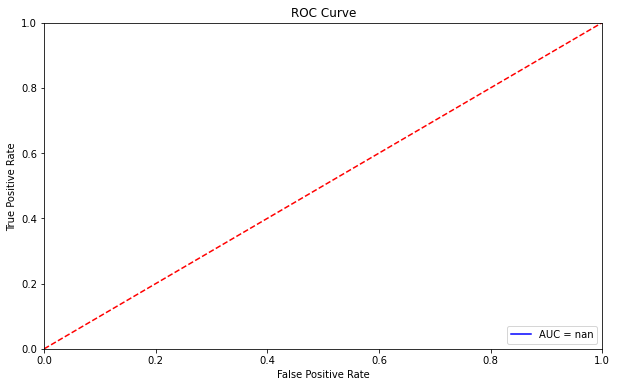

,0,1
3,Pressure(in),0.364422
2,Humidity(%),0.210547
1,Temperature(F),0.178532
5,Wind_Speed(mph),0.133487
0,Distance(mi),0.018469
4,Visibility(mi),0.013131
9,Weather_Condition1_Clear,0.009791
8,Side_R,0.009779
10,Weather_Condition1_Cloudy,0.009180
7,Side_L,0.009154


In [42]:
# train the model
rf = RandomForestClassifier(random_state=18, n_estimators=100)
rf.fit(X_train, y_train)

#get predictions
in_sample_preds = rf.predict(X_train)
out_sample_preds = rf.predict(X_test)

# get evaluation report
print("Random Forest Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, pos_label=2)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

pd.DataFrame(list(zip(features.columns, rf.feature_importances_))).sort_values(by=1, ascending=False).head(10)

In [43]:
# save the model to disk
filename = 'mild_model.sav'
pickle.dump(rf, open(filename, 'wb'))

Ada Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.39      0.01      0.02       857
           1       1.00      1.00      1.00    185606

    accuracy                           1.00    186463
   macro avg       0.69      0.51      0.51    186463
weighted avg       0.99      1.00      0.99    186463


Confusion Matrix - In Sample
[[     9    848]
 [    14 185592]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.43      0.02      0.03       198
           1       1.00      1.00      1.00     46418

    accuracy                           1.00     46616
   macro avg       0.71      0.51      0.51     46616
weighted avg       0.99      1.00      0.99     46616


Confusion Matrix - Out Sample
[[    3   195]
 [    4 46414]]


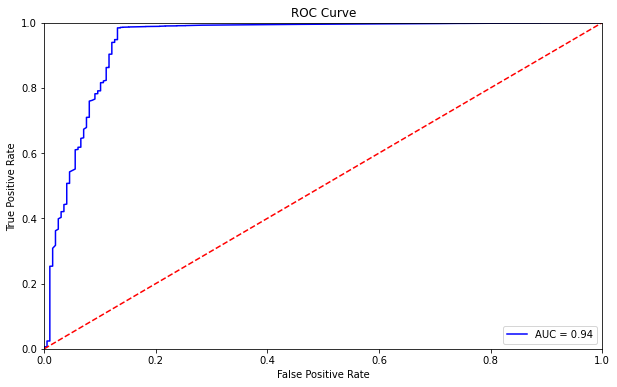

In [44]:
# train the model
ada = AdaBoostClassifier(random_state=18)
ada.fit(X_train, y_train)

#get predictions
in_sample_preds = ada.predict(X_train)
out_sample_preds = ada.predict(X_test)

# get evaluation report
print("Ada Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = ada.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

GradientBoosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.77      0.11      0.19       857
           1       1.00      1.00      1.00    185606

    accuracy                           1.00    186463
   macro avg       0.88      0.55      0.59    186463
weighted avg       0.99      1.00      0.99    186463


Confusion Matrix - In Sample
[[    92    765]
 [    28 185578]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.48      0.06      0.10       198
           1       1.00      1.00      1.00     46418

    accuracy                           1.00     46616
   macro avg       0.74      0.53      0.55     46616
weighted avg       0.99      1.00      0.99     46616


Confusion Matrix - Out Sample
[[   11   187]
 [   12 46406]]


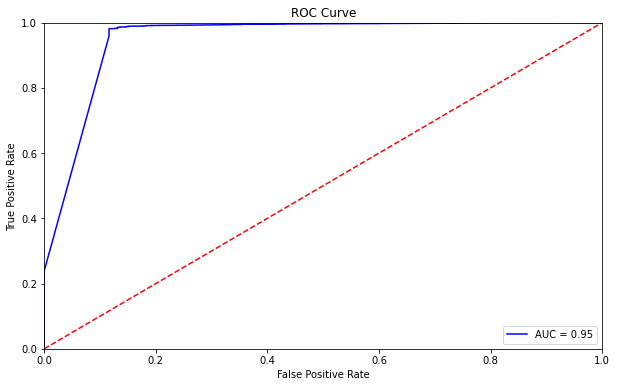

In [45]:
# train the model
gb = GradientBoostingClassifier(random_state=18)
gb.fit(X_train, y_train)

#get predictions
in_sample_preds = gb.predict(X_train)
out_sample_preds = gb.predict(X_test)

# get evaluation report
print("GradientBoosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = gb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\Ryan Permenter\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:34:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.88      0.54      0.67       857
           1       1.00      1.00      1.00    185606

    accuracy                           1.00    186463
   macro avg       0.94      0.77      0.83    186463
weighted avg       1.00      1.00      1.00    186463


Confusion Matrix - In Sample
[[   462    395]
 [    64 185542]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.51      0.26      0.34       198
           1       1.00      1.00      1.00     46418

    accuracy                           1.0

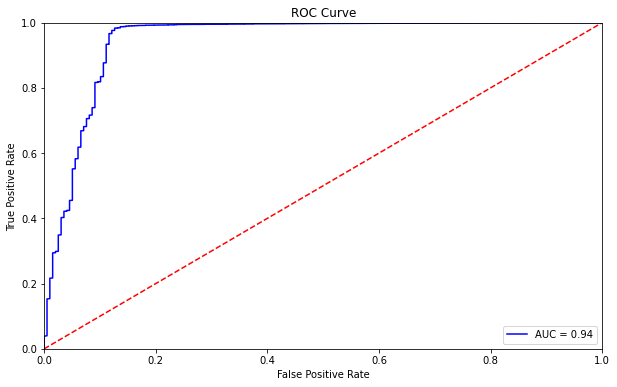

In [46]:
# train the model
xgb = XGBClassifier(random_state=18)
xgb.fit(X_train, y_train)

#get predictions
in_sample_preds = xgb.predict(X_train)
out_sample_preds = xgb.predict(X_test)

# get evaluation report
print("XG Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Severe Severity Models

In [47]:
df_severe_linear["Severity"].replace((4, 3), (1, 0), inplace=True)

# get pandas columns for prediction
target = df_severe_linear["Severity"]
features = df_severe_linear.drop(["Severity"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

C:\Users\Ryan Permenter\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     64507
           1       0.58      0.06      0.11      3409

    accuracy                           0.95     67916
   macro avg       0.77      0.53      0.54     67916
weighted avg       0.93      0.95      0.93     67916


Confusion Matrix - In Sample
[[64366   141]
 [ 3211   198]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     16150
           1       0.56      0.06      0.10       830

    accuracy                           0.95     16980
   macro avg       0.76      0.53      0.54     16980
weighted avg       0.93      0.95      0.93     16980


Confusion Matrix - Out Sample
[[16114    36]
 [  784    46]]


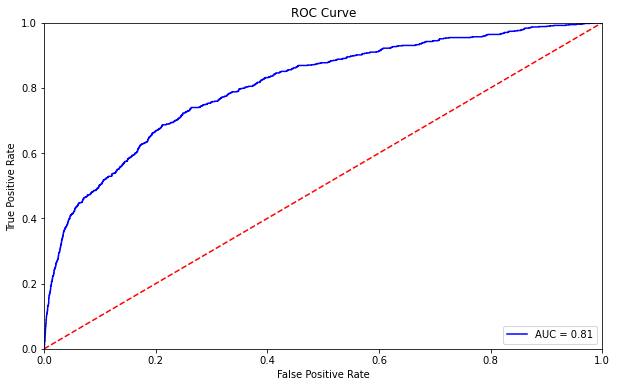

In [48]:
reg = LogisticRegression()
reg.fit(X_train, y_train)

#get predictions
in_sample_preds = reg.predict(X_train)
out_sample_preds = reg.predict(X_test)

# get evaluation report
print("Logistic Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = reg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [49]:
df_severe_other["Severity"].replace((4, 3), (1, 0), inplace=True)

# get pandas columns for prediction
target = df_severe_other["Severity"]
features = df_severe_other.drop(["Severity"], axis=1)

# convert to lists/arrays (MUST HAPPEN)
X = np.array(features)
y = np.array(target)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

Decision Tree Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64507
           1       1.00      0.98      0.99      3409

    accuracy                           1.00     67916
   macro avg       1.00      0.99      0.99     67916
weighted avg       1.00      1.00      1.00     67916


Confusion Matrix - In Sample
[[64507     0]
 [   72  3337]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     16150
           1       0.30      0.35      0.32       830

    accuracy                           0.93     16980
   macro avg       0.64      0.65      0.64     16980
weighted avg       0.93      0.93      0.93     16980


Confusion Matrix - Out Sample
[[15489   661]
 [  541   289]]


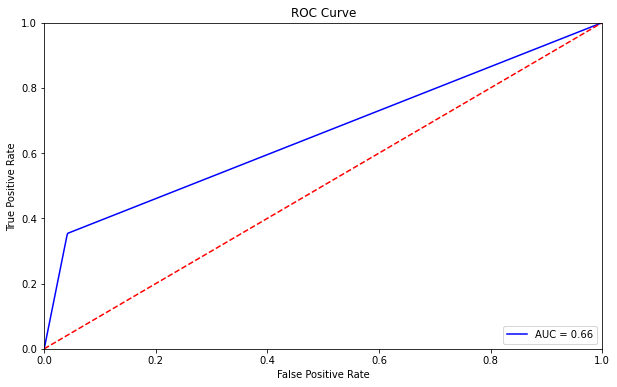

In [50]:
# train the model
dt = DecisionTreeClassifier(random_state=18)
dt.fit(X_train, y_train)

#get predictions
in_sample_preds = dt.predict(X_train)
out_sample_preds = dt.predict(X_test)

# get evaluation report
print("Decision Tree Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = dt.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     64507
           1       1.00      0.98      0.99      3409

    accuracy                           1.00     67916
   macro avg       1.00      0.99      0.99     67916
weighted avg       1.00      1.00      1.00     67916


Confusion Matrix - In Sample
[[64503     4]
 [   68  3341]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     16150
           1       0.62      0.21      0.31       830

    accuracy                           0.96     16980
   macro avg       0.79      0.60      0.64     16980
weighted avg       0.94      0.96      0.94     16980


Confusion Matrix - Out Sample
[[16044   106]
 [  657   173]]


C:\Users\Ryan Permenter\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:811: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


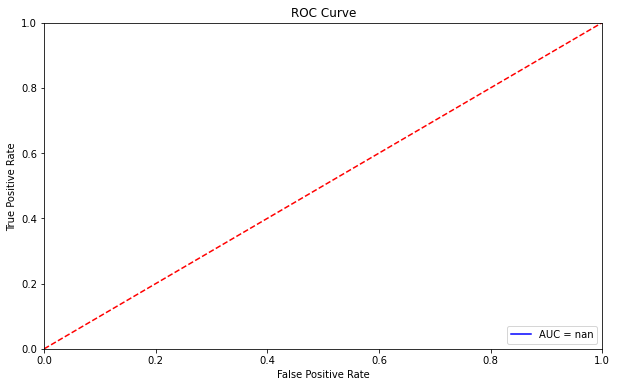

,0,1
0,Distance(mi),0.312036
3,Pressure(in),0.169502
1,Temperature(F),0.148557
2,Humidity(%),0.141997
5,Wind_Speed(mph),0.118042
4,Visibility(mi),0.032113
6,Precipitation(in),0.012310
10,Weather_Condition1_Cloudy,0.009728
9,Weather_Condition1_Clear,0.008968
23,Road_Type_Highway,0.005052


In [51]:
# train the model
rf = RandomForestClassifier(random_state=18, n_estimators=100)
rf.fit(X_train, y_train)

#get predictions
in_sample_preds = rf.predict(X_train)
out_sample_preds = rf.predict(X_test)

# get evaluation report
print("Random Forest Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, pos_label=2)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

pd.DataFrame(list(zip(features.columns, rf.feature_importances_))).sort_values(by=1, ascending=False).head(10)

In [52]:
# save the model to disk
filename = 'severe_model.sav'
pickle.dump(rf, open(filename, 'wb'))

Ada Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     64507
           1       0.51      0.11      0.19      3409

    accuracy                           0.95     67916
   macro avg       0.73      0.55      0.58     67916
weighted avg       0.93      0.95      0.93     67916


Confusion Matrix - In Sample
[[64126   381]
 [ 3017   392]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     16150
           1       0.46      0.11      0.18       830

    accuracy                           0.95     16980
   macro avg       0.71      0.55      0.57     16980
weighted avg       0.93      0.95      0.94     16980


Confusion Matrix - Out Sample
[[16045   105]
 [  740    90]]


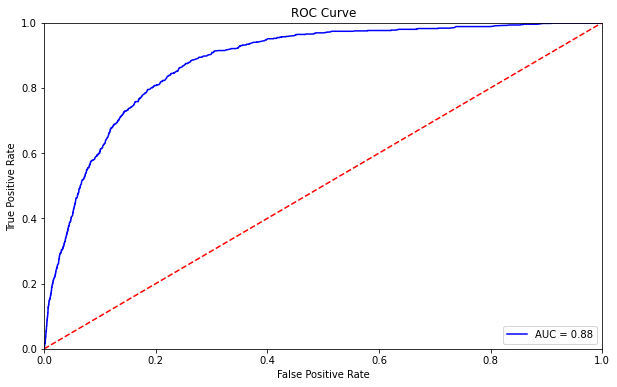

In [53]:
# train the model
ada = AdaBoostClassifier(random_state=18)
ada.fit(X_train, y_train)

#get predictions
in_sample_preds = ada.predict(X_train)
out_sample_preds = ada.predict(X_test)

# get evaluation report
print("Ada Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = ada.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

GradientBoosting Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     64507
           1       0.67      0.14      0.23      3409

    accuracy                           0.95     67916
   macro avg       0.81      0.57      0.61     67916
weighted avg       0.94      0.95      0.94     67916


Confusion Matrix - In Sample
[[64265   242]
 [ 2923   486]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     16150
           1       0.54      0.11      0.18       830

    accuracy                           0.95     16980
   macro avg       0.75      0.55      0.58     16980
weighted avg       0.94      0.95      0.94     16980


Confusion Matrix - Out Sample
[[16071    79]
 [  738    92]]


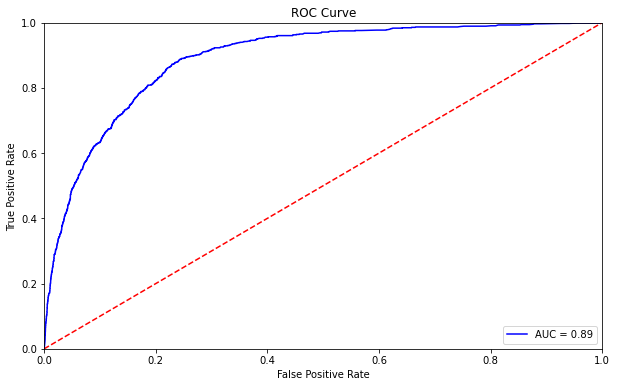

In [54]:
# train the model
gb = GradientBoostingClassifier(random_state=18)
gb.fit(X_train, y_train)

#get predictions
in_sample_preds = gb.predict(X_train)
out_sample_preds = gb.predict(X_test)

# get evaluation report
print("GradientBoosting Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = gb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\Ryan Permenter\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG Boost Classifier:
Classification Report - In Sample
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     64507
           1       0.91      0.35      0.51      3409

    accuracy                           0.97     67916
   macro avg       0.94      0.68      0.75     67916
weighted avg       0.96      0.97      0.96     67916


Confusion Matrix - In Sample
[[64387   120]
 [ 2199  1210]]


Classification Report - Out Sample
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     16150
           1       0.57      0.19      0.28       830

    accuracy                           0.95   

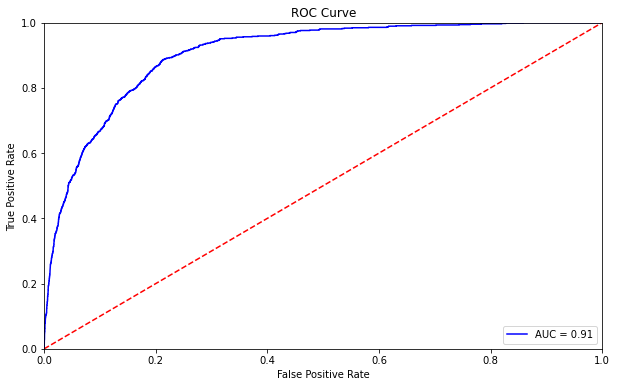

In [55]:
# train the model
xgb = XGBClassifier(random_state=18)
xgb.fit(X_train, y_train)

#get predictions
in_sample_preds = xgb.predict(X_train)
out_sample_preds = xgb.predict(X_test)

# get evaluation report
print("XG Boost Classifier:")
print("Classification Report - In Sample")
print(classification_report(y_train, in_sample_preds))
print()
print("Confusion Matrix - In Sample")
print(confusion_matrix(y_train, in_sample_preds))
print()
print()
print("Classification Report - Out Sample")
print(classification_report(y_test, out_sample_preds))
print()
print("Confusion Matrix - Out Sample")
print(confusion_matrix(y_test, out_sample_preds))

# get probabilities for the ROC curve
preds = xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(10,6))
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()